In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [3]:
#Read the AAPL.csv data files
aapl_csv = Path("Resources/aapl.csv")
aapl =pd.read_csv(aapl_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl = aapl.rename(columns={"Close":"aapl"})
aapl = aapl[["aapl"]]
aapl


,aapl
Date,
2016-10-13,29.245001
2016-10-14,29.407499
2016-10-17,29.387501
2016-10-18,29.367500
2016-10-19,29.280001
...,...
2021-10-06,142.000000
2021-10-07,143.289993
2021-10-08,142.899994


In [4]:
#Count Nulls
print(aapl.isnull().sum())
print(aapl[aapl.isnull().any(axis = 1)])


aapl    0
dtype: int64
Empty DataFrame
Columns: [aapl]
Index: []


In [5]:
#Drop nulls
aapl.dropna(inplace=True)


In [6]:
#Read the goog.csv data files
goog_csv = Path("Resources/goog.csv")
goog =pd.read_csv(goog_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog = goog.rename(columns={"Close":"goog"})
goog = goog[["goog"]]
goog

,goog
Date,
2016-10-13,778.190002
2016-10-14,778.530029
2016-10-17,779.960022
2016-10-18,795.260010
2016-10-19,801.500000
...,...
2021-10-06,2747.080078
2021-10-07,2783.709961
2021-10-08,2801.120117


In [7]:
#Count Nulls
print(goog.isnull().sum())
print(goog[goog.isnull().any(axis = 1)])



goog    0
dtype: int64
Empty DataFrame
Columns: [goog]
Index: []


In [8]:
#Drop nulls
goog.dropna(inplace=True)


In [9]:
#Read the nflx.csv data files
nflx_csv = Path("Resources/nflx.csv")
nflx =pd.read_csv(nflx_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
nflx = nflx.rename(columns={"Close":"nflx"})
nflx = nflx[["nflx"]]
nflx

,nflx
Date,
2016-10-13,100.230003
2016-10-14,101.470001
2016-10-17,99.800003
2016-10-18,118.790001
2016-10-19,121.870003
...,...
2021-10-06,639.099976
2021-10-07,631.849976
2021-10-08,632.659973


In [10]:
#Count Nulls
print(nflx.isnull().sum())
print(nflx[nflx.isnull().any(axis = 1)])

nflx    0
dtype: int64
Empty DataFrame
Columns: [nflx]
Index: []


In [11]:
#Drop nulls
nflx.dropna(inplace=True)

In [12]:
#Read the nvda.csv data files
nvda_csv = Path("Resources/nflx.csv")
nvda =pd.read_csv(nvda_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
nvda = nvda.rename(columns={"Close":"nvda"})
nvda = nvda[["nvda"]]
nvda

,nvda
Date,
2016-10-13,100.230003
2016-10-14,101.470001
2016-10-17,99.800003
2016-10-18,118.790001
2016-10-19,121.870003
...,...
2021-10-06,639.099976
2021-10-07,631.849976
2021-10-08,632.659973


In [13]:
#Count Nulls
print(nvda.isnull().sum())
print(nvda[nvda.isnull().any(axis = 1)])

nvda    0
dtype: int64
Empty DataFrame
Columns: [nvda]
Index: []


In [15]:
#Drop nulls
nvda.dropna(inplace=True)

In [16]:
# Join AAPL, GOOG, NFLX, and NVDA into a single Data Frame
df_daily = pd.concat([aapl,goog,nflx,nvda], axis = "columns", join = "inner")
df_daily_returns = df_daily.pct_change()
df_daily_returns = df_daily_returns.dropna().copy()
df_daily_returns

,aapl,goog,nflx,nvda
Date,,,,
2016-10-14,0.005556,0.000437,0.012372,0.012372
2016-10-17,-0.000680,0.001837,-0.016458,-0.016458
2016-10-18,-0.000681,0.019616,0.190281,0.190281
2016-10-19,-0.002979,0.007846,0.025928,0.025928
2016-10-20,-0.000512,-0.005652,0.012144,0.012144
...,...,...,...,...
2021-10-06,0.006307,0.008643,0.006758,0.006758
2021-10-07,0.009084,0.013334,-0.011344,-0.011344
2021-10-08,-0.002722,0.006254,0.001282,0.001282


<AxesSubplot:xlabel='Date'>

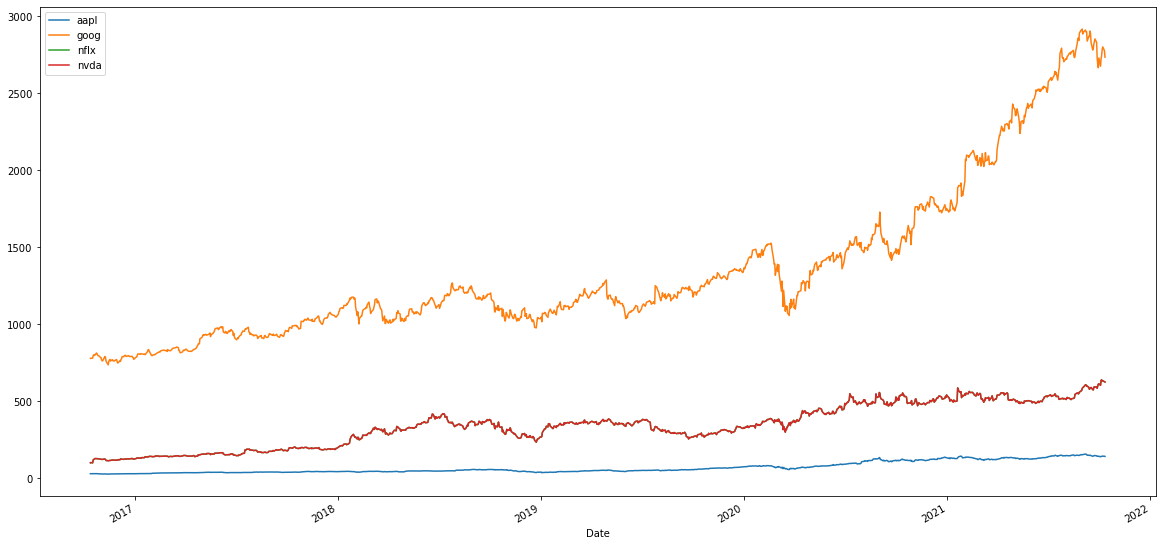

In [17]:
# PLot daily returns of all portfolios
df_daily.plot(figsize = (20,10))


In [18]:
df_cum = (1+ df_daily_returns).cumprod()

df_cum.replace([np.inf,-np.inf],np.nan,inplace=True)
df_cum = df_cum.dropna().copy()
df_cum


,aapl,goog,nflx,nvda
Date,,,,
2016-10-14,1.005556,1.000437,1.012372,1.012372
2016-10-17,1.004873,1.002275,0.995710,0.995710
2016-10-18,1.004189,1.021936,1.185174,1.185174
2016-10-19,1.001197,1.029954,1.215903,1.215903
2016-10-20,1.000684,1.024133,1.230669,1.230669
...,...,...,...,...
2021-10-06,4.855531,3.530089,6.376334,6.376334
2021-10-07,4.899641,3.577160,6.304000,6.304000
2021-10-08,4.886305,3.599532,6.312082,6.312082


<AxesSubplot:xlabel='Date'>

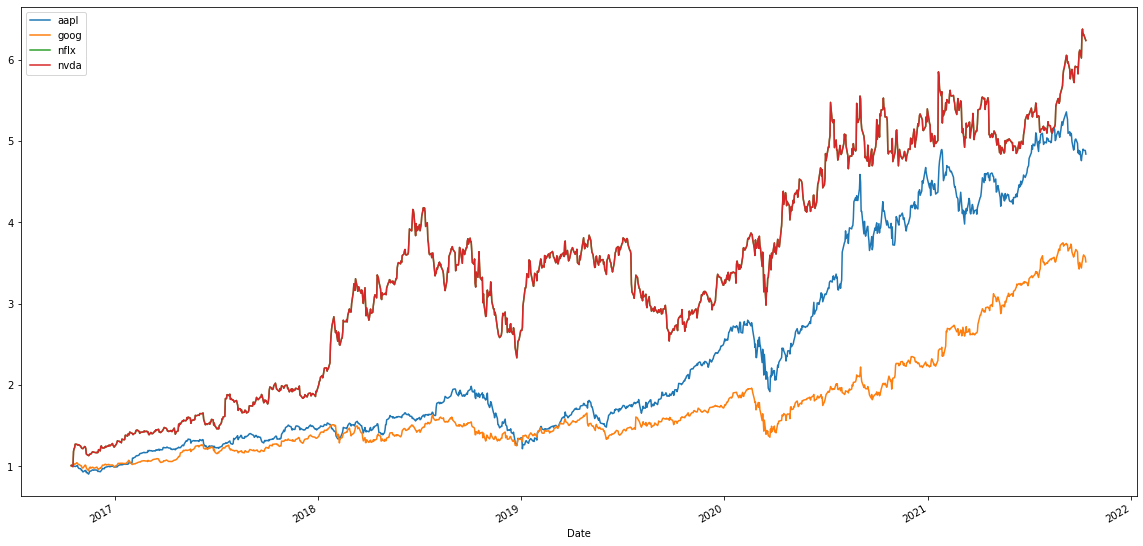

In [19]:
# Plot cumulative returns
df_cum.plot(figsize = (20,10))

 <AxesSubplot:xlabel='Date'>


<AxesSubplot:>

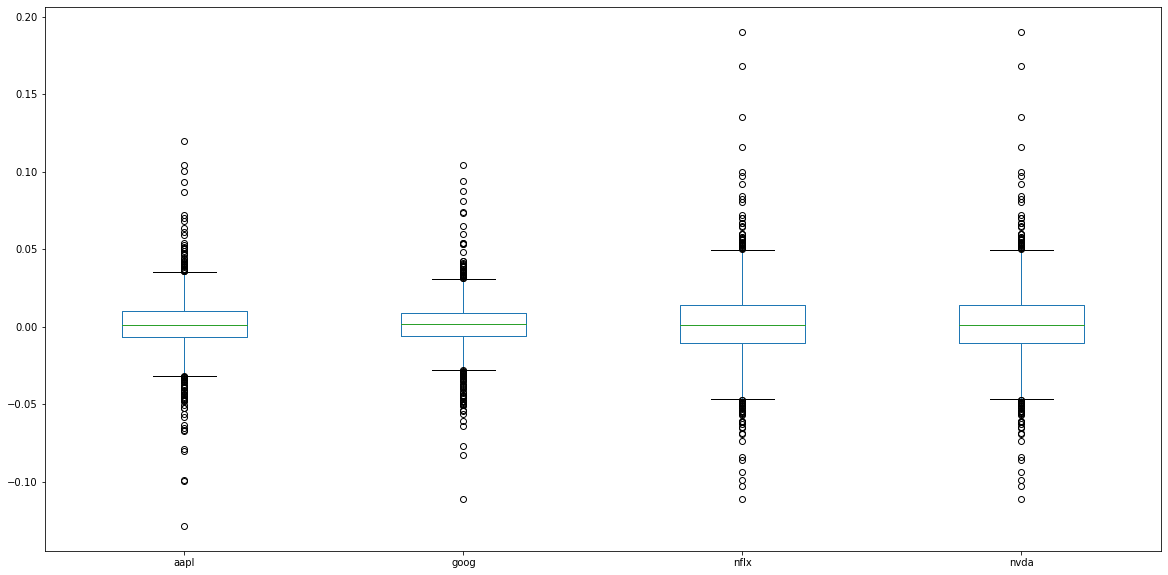

In [20]:
# Box plot to visually show risk
df_daily_returns.plot(kind = "box", figsize = (20,10))

In [21]:
<AxesSubplot:>

SyntaxError: invalid syntax (<ipython-input-21-d2f470e82ae5>, line 1)

In [22]:
# Calculate the standard deviation of all stocks
#df_daily_std = pd.DataFrame(df_daily.std()).rename(columns - [0:"std"})
df_daily_returns.std()

aapl    0.019043
goog    0.016909
nflx    0.024573
nvda    0.024573
dtype: float64

In [23]:
# Calculate the Annualized Std Deviation (252 trading days)
df_annualized_std = df_daily_returns.std()*np.sqrt(252)
df_annualized_std


aapl    0.302294
goog    0.268417
nflx    0.390088
nvda    0.390088
dtype: float64